Cargando datos para el sol 75 de ambos datasets...
Datos cargados. Realizando conversión y fusión...
Datos listos para graficar.
Generando el gráfico y guardando en 'grafico_03_perfil_ambiental_sol_75.png'...


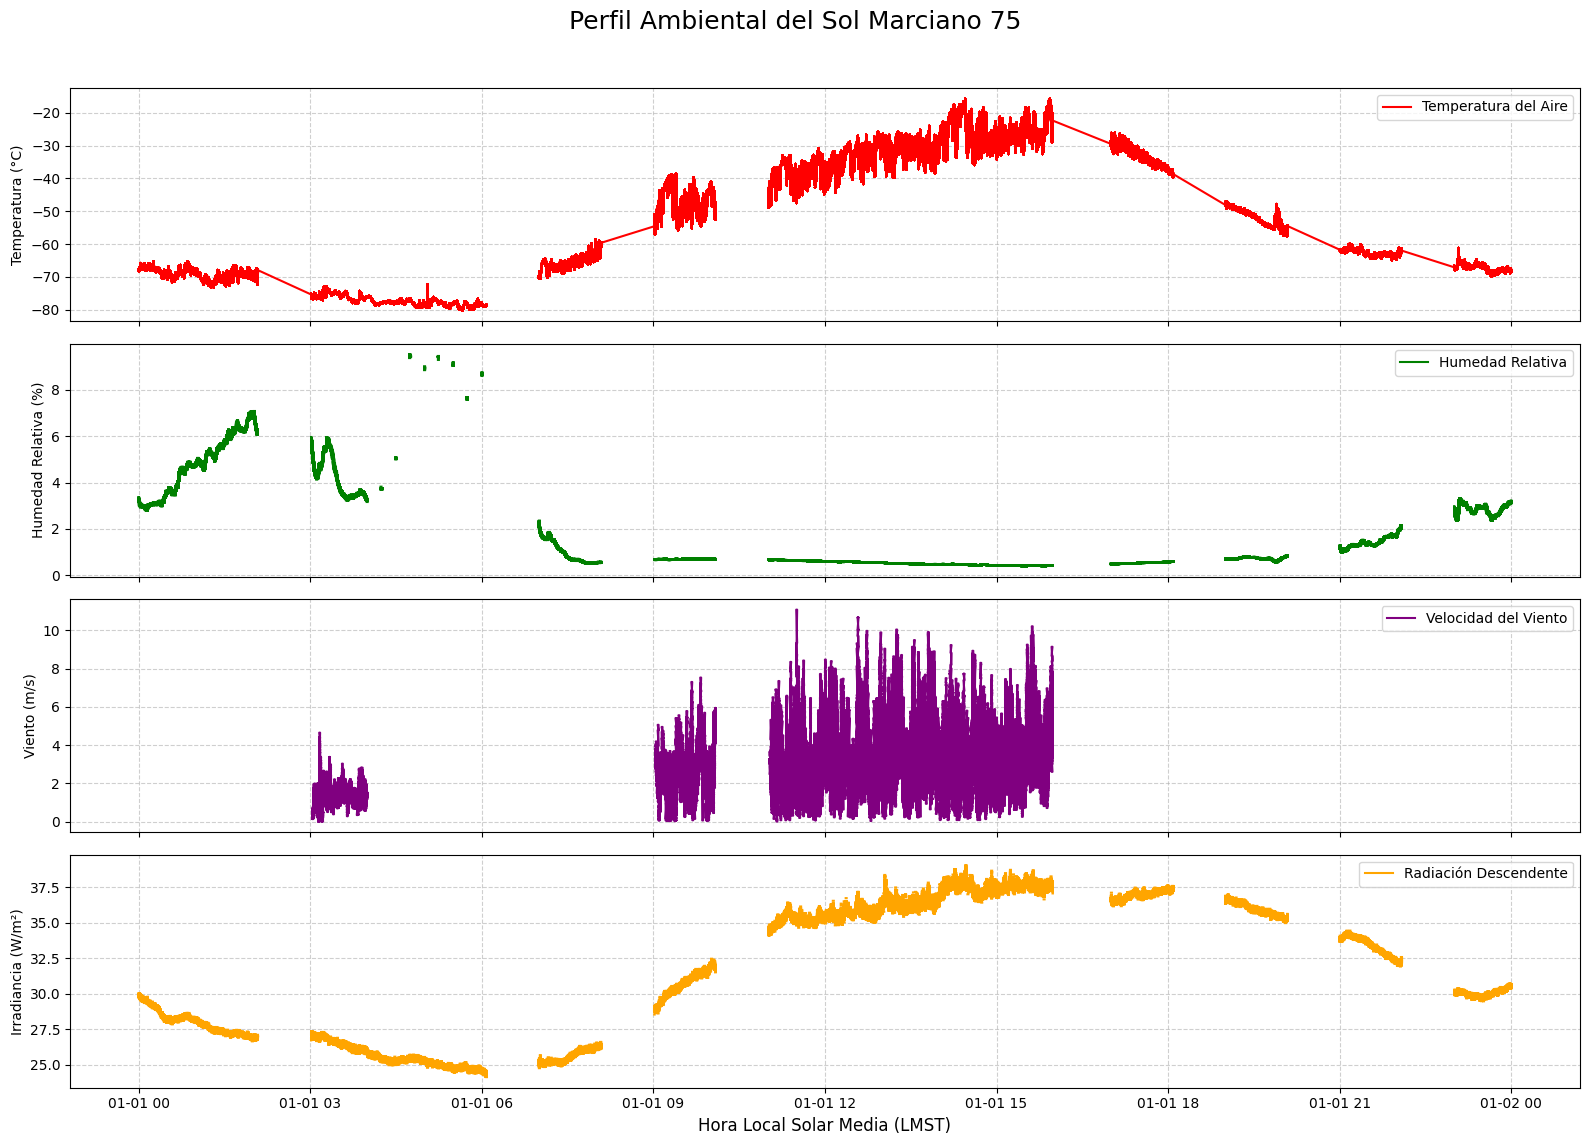

Proceso finalizado. El gráfico fue guardado en 'grafico_03_perfil_ambiental_sol_75.png'.


In [3]:
# -*- coding: utf-8 -*-
"""
Análisis combinado del perfil ambiental de un día marciano (Sol).
Carga datos de los archivos DERIVADOS y CALIBRADOS para un único sol,
los fusiona y genera un gráfico multi-panel con la evolución de las
variables ambientales clave.
"""
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. CONFIGURACIÓN DEL GRÁFICO Y ANÁLISIS ---

# Parámetros del gráfico
TAMAÑO_FIGURA = (16, 12)
RESOLUCION_DPI = 300
# El nombre del archivo se genera dinámicamente según el sol analizado

# Parámetros del análisis
ARCHIVO_DERIVADO = 'dataset_meda_derived_data.parquet'
ARCHIVO_CALIBRADO = 'dataset_meda_calibrated_data.parquet'
# Sol a analizar (elegir uno de los "mejores soles comunes" que encontramos)
SOL_A_ANALIZAR = 75

# --- 2. CARGA Y FUSIÓN DE DATOS ---
print(f"Cargando datos para el sol {SOL_A_ANALIZAR} de ambos datasets...")
try:
    # Cargamos las columnas que necesitamos del archivo DERIVADO
    df_derived_sol = pd.read_parquet(
        ARCHIVO_DERIVADO,
        columns=['SCLK', 'sol', 'LOCAL_RELATIVE_HUMIDITY', 'HORIZONTAL_WIND_SPEED', 'DOWNWARD_LW_IRRADIANCE'],
        filters=[('sol', '==', SOL_A_ANALIZAR)]
    )

    # Cargamos las columnas que necesitamos del archivo CALIBRADO
    df_calibrated_sol = pd.read_parquet(
        ARCHIVO_CALIBRADO,
        columns=['SCLK', 'sol', 'ATS_LOCAL_TEMP1', 'LMST_ats_datetime'],
        filters=[('sol', '==', SOL_A_ANALIZAR)]
    )
    print("Datos cargados. Realizando conversión y fusión...")

    # Convertimos la temperatura de Kelvin a Celsius
    if not df_calibrated_sol.empty:
        df_calibrated_sol['ATS_LOCAL_TEMP1_C'] = df_calibrated_sol['ATS_LOCAL_TEMP1'] - 273.15

    # Fusionamos los dos DataFrames
    if not df_derived_sol.empty and not df_calibrated_sol.empty:
        df_completo_sol = pd.merge(df_derived_sol, df_calibrated_sol, on=['SCLK', 'sol'], how='outer')
        df_completo_sol = df_completo_sol.sort_values(by='SCLK')
        print("Datos listos para graficar.")
    else:
        print(f"Faltan datos de uno de los archivos para el sol {SOL_A_ANALIZAR}.")
        df_completo_sol = pd.DataFrame()

# --- 3. CREACIÓN DEL GRÁFICO MULTI-PANEL ---
    if not df_completo_sol.empty:
        nombre_archivo_salida = f"grafico_03_perfil_ambiental_sol_{SOL_A_ANALIZAR}.png"
        print(f"Generando el gráfico y guardando en '{nombre_archivo_salida}'...")
        
        # Creamos una figura con 4 subplots verticales que comparten el eje X
        fig, axes = plt.subplots(4, 1, figsize=TAMAÑO_FIGURA, sharex=True)
        fig.suptitle(f'Perfil ambiental del sol marciano {SOL_A_ANALIZAR}', fontsize=18)

        # Panel 1: Temperatura (ATS)
        axes[0].plot(df_completo_sol['LMST_ats_datetime'], df_completo_sol['ATS_LOCAL_TEMP1_C'], color='red', label='Temperatura del Aire')
        axes[0].set_ylabel('Temperatura (°C)')
        axes[0].legend(loc='upper right')
        axes[0].grid(True, linestyle='--', alpha=0.6)

        # Panel 2: Humedad (RHS)
        axes[1].plot(df_completo_sol['LMST_ats_datetime'], df_completo_sol['LOCAL_RELATIVE_HUMIDITY'], color='green', label='Humedad Relativa')
        axes[1].set_ylabel('Humedad Relativa (%)')
        axes[1].legend(loc='upper right')
        axes[1].grid(True, linestyle='--', alpha=0.6)

        # Panel 3: Velocidad del Viento (WS)
        axes[2].plot(df_completo_sol['LMST_ats_datetime'], df_completo_sol['HORIZONTAL_WIND_SPEED'], color='purple', label='Velocidad del Viento')
        axes[2].set_ylabel('Viento (m/s)')
        axes[2].legend(loc='upper right')
        axes[2].grid(True, linestyle='--', alpha=0.6)

        # Panel 4: Radiación (TIRS)
        axes[3].plot(df_completo_sol['LMST_ats_datetime'], df_completo_sol['DOWNWARD_LW_IRRADIANCE'], color='orange', label='Radiación Descendente')
        axes[3].set_ylabel('Irradiancia (W/m²)')
        axes[3].set_xlabel('Hora Local Solar Media (LMST)', fontsize=12)
        axes[3].legend(loc='upper right')
        axes[3].grid(True, linestyle='--', alpha=0.6)
        
        plt.tight_layout(rect=[0, 0.03, 1, 0.96])
        
# --- 4. GUARDADO Y VISUALIZACIÓN ---
        plt.savefig(nombre_archivo_salida, dpi=RESOLUCION_DPI, bbox_inches='tight')
        plt.show()
        
        print(f"Proceso finalizado. El gráfico fue guardado en '{nombre_archivo_salida}'.")

except Exception as e:
    print(f"Ocurrió un error: {e}")